In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import sklearn 


In [20]:
import sklearn 

In [21]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)


numpy 1.24.3
pandas 2.0.3
sklearn 1.3.0


In [6]:
dataset_dir ="C:/Users/lenovo/Downloads/dataset/dataset/train"

In [7]:
import os

# Initialize the lists to store file paths and labels
file_paths = []
labels = []

for subdir in os.listdir(dataset_dir):
    subdir_path = os.path.join(dataset_dir, subdir)
    for file in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, file)
        file_paths.append(file_path)
        labels.append(subdir)

In [9]:
# Create a DataFrame with the file paths and labels
df = pd.DataFrame({'image_path': file_paths, 'label': labels})

# Display the rows of the dataset
print(df)

                                             image_path  \
0     C:/Users/lenovo/Downloads/dataset/dataset/trai...   
1     C:/Users/lenovo/Downloads/dataset/dataset/trai...   
2     C:/Users/lenovo/Downloads/dataset/dataset/trai...   
3     C:/Users/lenovo/Downloads/dataset/dataset/trai...   
4     C:/Users/lenovo/Downloads/dataset/dataset/trai...   
...                                                 ...   
3995  C:/Users/lenovo/Downloads/dataset/dataset/trai...   
3996  C:/Users/lenovo/Downloads/dataset/dataset/trai...   
3997  C:/Users/lenovo/Downloads/dataset/dataset/trai...   
3998  C:/Users/lenovo/Downloads/dataset/dataset/trai...   
3999  C:/Users/lenovo/Downloads/dataset/dataset/trai...   

                                                  label  
0     Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...  
1     Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...  
2     Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...  
3     Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...  
4

In [10]:
df.shape

(4000, 2)

In [11]:
df.head()

,image_path,label
0,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
1,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
2,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
3,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
4,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...


In [7]:
df.tail()

,image_path,label
3995,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Rice_healthy
3996,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Rice_healthy
3997,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Rice_healthy
3998,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Rice_healthy
3999,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Rice_healthy


In [8]:
df.sample(5)

,image_path,label
1734,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Mango___Powdery_mildew
2334,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Potato___Early_blight
1205,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Mango_healthy
3840,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Rice_healthy
3558,C:/Users/lenovo/Downloads/dataset/dataset/trai...,Rice_healthy


In [9]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  4000 non-null   object
 1   label       4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [12]:
# Get the unique labels and their counts
labels = df['label'].unique()
label_counts = df['label'].value_counts()
print("Unique labels:", labels)
print("Label counts:", label_counts)

Unique labels: ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___healthy' 'Mango_healthy' 'Mango___Powdery_mildew'
 'Potato___Early_blight' 'Potato___healthy' 'Rice_Brown_Spot'
 'Rice_healthy']
Label counts: label
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    500
Corn_(maize)___healthy                                500
Mango_healthy                                         500
Mango___Powdery_mildew                                500
Potato___Early_blight                                 500
Potato___healthy                                      500
Rice_Brown_Spot                                       500
Rice_healthy                                          500
Name: count, dtype: int64


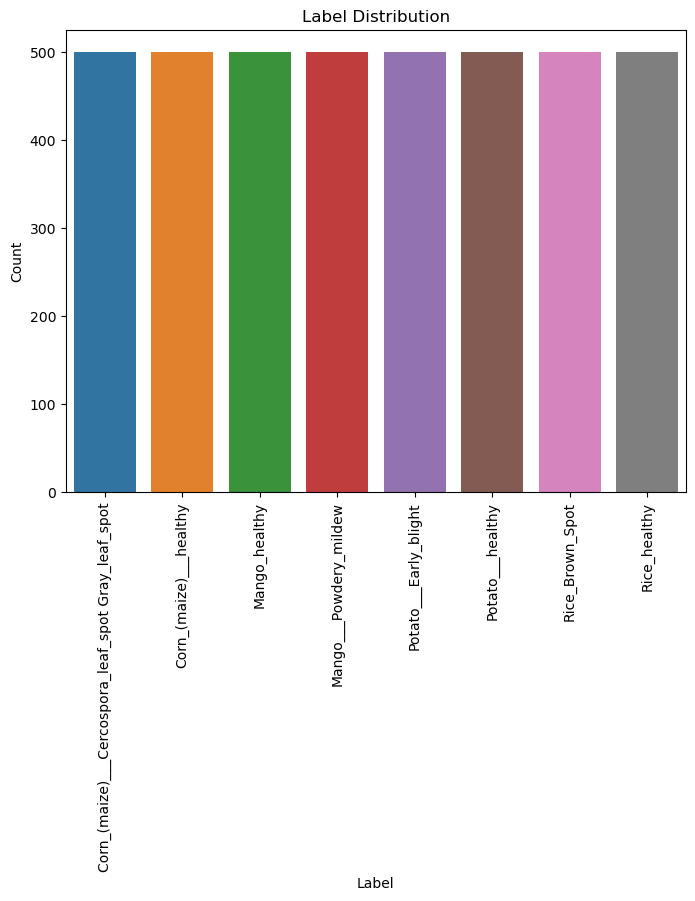

In [12]:
# Visualize the label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.xticks(rotation=90)  # Corrected line
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [13]:
from PIL import Image, UnidentifiedImageError
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load and resize the images
img_size = (224, 224)  # adjust the image size as needed
images = []
labels_encoded = []
le = LabelEncoder()

for idx, row in df.iterrows():
    img_path = row['image_path']
    try:
        img = Image.open(img_path)
        img = img.resize(img_size)
        images.append(np.array(img))
        labels_encoded.append(le.fit_transform([row['label']])[0])
    except UnidentifiedImageError:
        print(f"Error: Unable to identify image file {img_path}. Skipping...")

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)



NameError: name 'sklearn' is not defined

In [17]:
# Data augmentation using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train)



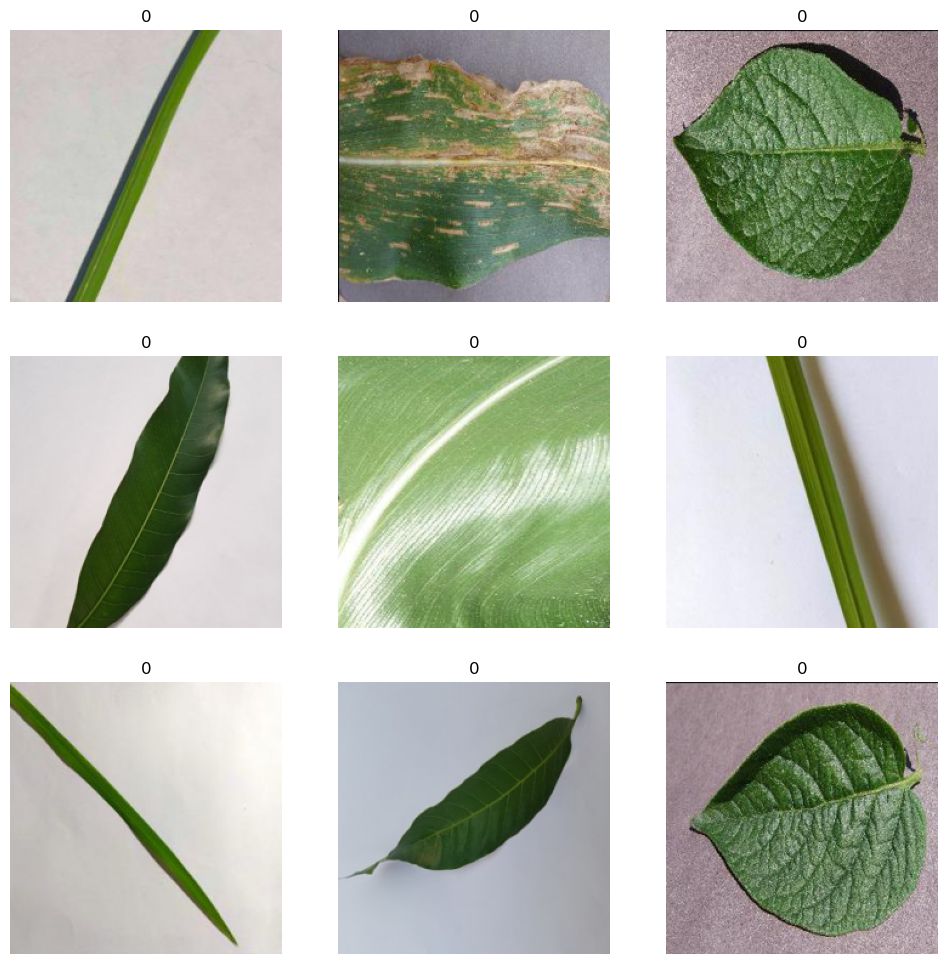

In [18]:
import matplotlib.pyplot as plt
# Visualize some sample images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

# Training Image Preprocessing

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/lenovo/Downloads/dataset/dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4000 files belonging to 8 classes.


In [19]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [20]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[238.      243.      237.     ]
   [238.      243.      237.     ]
   [238.      243.      237.     ]
   ...
   [245.5     249.5     248.5    ]
   [243.5     247.5     246.5    ]
   [242.25    246.25    245.25   ]]

  [[238.      243.      237.     ]
   [238.      243.      237.     ]
   [238.      243.      237.     ]
   ...
   [245.25    249.25    248.25   ]
   [243.75    247.75    246.75   ]
   [243.      247.      246.     ]]

  [[238.      243.      237.     ]
   [238.      243.      237.     ]
   [238.      243.      237.     ]
   ...
   [245.      249.      248.     ]
   [244.      248.      247.     ]
   [244.      248.      247.     ]]

  ...

  [[142.      124.75    108.5    ]
   [141.25    124.25    107.25   ]
   [140.25    124.25    105.25   ]
   ...
   [170.25    172.25    138.5    ]
   [176.75    178.75    145.5    ]
   [180.75    182.75    149.5    ]]

  [[143.5     123.25    104.5    ]
   [143.25    122.75    104.75   ]
   [141.25    121.75    104.75   ]
 

# Validation Image Preprocessing 

In [21]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/lenovo/Downloads/dataset/dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1000 files belonging to 8 classes.


In [22]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [23]:
for x,y in validation_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[253.74219 254.78516 252.63281]
   [247.48047 249.75    244.125  ]
   [249.69922 250.52344 246.05078]
   ...
   [227.86328 228.5625  224.32812]
   [225.16797 226.16797 221.14844]
   [232.90234 228.16016 226.75   ]]

  [[253.76953 249.75    246.75   ]
   [254.9414  250.8164  249.8789 ]
   [251.24219 252.24219 247.24219]
   ...
   [226.19531 227.19531 222.19531]
   [232.10156 227.98438 224.99219]
   [233.71094 229.08203 226.96094]]

  [[252.73828 250.03906 242.08594]
   [252.52734 249.875   247.38672]
   [254.      255.      249.6836 ]
   ...
   [230.94922 225.63281 223.33594]
   [233.5     228.5     225.5    ]
   [233.26172 228.125   225.23438]]

  ...

  [[228.89062 231.41406 220.41406]
   [227.20312 229.3125  219.64844]
   [228.4414  230.45703 221.94922]
   ...
   [166.5625  168.54688 162.2461 ]
   [168.125   168.1875  166.     ]
   [166.26172 167.125   162.23438]]

  [[226.02344 227.02344 219.02344]
   [219.60938 220.60938 212.60938]
   [228.9375  230.875   220.0625 ]
 

# Building model

In [24]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential()

# Building Convolution Layer

In [26]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\anaconada\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.add(Conv2D(filters=64,kernel_size=3 , padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3 ,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
model.add(Dropout(0.25))

In [32]:
model.add(Flatten())

In [33]:
model.add(Dense(units=1500,activation='relu'))

In [34]:
model.add(Dropout(0.4))

In [35]:
# Output Layer
model.add(Dense(units=8,activation='softmax'))

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │          12,008 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,797,732 (29.75 MB)

 Trainable params: 7,797,732 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

NameError: name 'sklearn' is not defined

# Model Training

In [38]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 86s 648ms/step - accuracy: 0.3213 - loss: 1.7626 - val_accuracy: 0.7750 - val_loss: 0.6497
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 521ms/step - accuracy: 0.7949 - loss: 0.5396 - val_accuracy: 0.8280 - val_loss: 0.5367
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 68s 547ms/step - accuracy: 0.8710 - loss: 0.3090 - val_accuracy: 0.8890 - val_loss: 0.3364
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 72s 578ms/step - accuracy: 0.9117 - loss: 0.2192 - val_accuracy: 0.9180 - val_loss: 0.2065
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 568ms/step - accuracy: 0.9216 - loss: 0.1944 - val_accuracy: 0.9180 - val_loss: 0.2340
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 569ms/step - accuracy: 0.9267 - loss: 0.1773 - val_accuracy: 0.9010 - val_loss: 0.3105
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 569ms/step - accuracy: 0.9369 - loss: 0.1575 - val_accuracy: 0.9270 - val_loss: 0.2199
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 567ms/step - accuracy: 0.9553 - loss: 0

In [39]:
train_loss,train_acc = model.evaluate(training_set)


125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 202ms/step - accuracy: 0.9586 - loss: 0.0931


In [40]:
print(train_loss, train_acc)

0.07793927192687988 0.96875


In [41]:
val_loss,val_acc = model.evaluate(validation_set)

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.9288 - loss: 0.2359


In [42]:
print(val_loss,val_acc)

0.22918373346328735 0.9269999861717224


In [43]:
model.save("trained_model.keras")

In [44]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [45]:
training_history.history

{'accuracy': [0.47600001096725464,
  0.8309999704360962,
  0.8957499861717224,
  0.9160000085830688,
  0.9279999732971191,
  0.9334999918937683,
  0.9452499747276306,
  0.9605000019073486,
  0.9599999785423279,
  0.9574999809265137],
 'loss': [1.289939284324646,
  0.4365578889846802,
  0.2579808533191681,
  0.21208545565605164,
  0.18210911750793457,
  0.16841791570186615,
  0.1477997899055481,
  0.0966944769024849,
  0.1079515665769577,
  0.11987081915140152],
 'val_accuracy': [0.7749999761581421,
  0.828000009059906,
  0.8889999985694885,
  0.9179999828338623,
  0.9179999828338623,
  0.9010000228881836,
  0.9269999861717224,
  0.9110000133514404,
  0.9150000214576721,
  0.9269999861717224],
 'val_loss': [0.6496877074241638,
  0.5367220044136047,
  0.3364296853542328,
  0.2064928561449051,
  0.2339683324098587,
  0.3105432987213135,
  0.21986761689186096,
  0.28095775842666626,
  0.23717035353183746,
  0.22918371856212616]}

In [46]:
training_history.history['accuracy']

[0.47600001096725464,
 0.8309999704360962,
 0.8957499861717224,
 0.9160000085830688,
 0.9279999732971191,
 0.9334999918937683,
 0.9452499747276306,
 0.9605000019073486,
 0.9599999785423279,
 0.9574999809265137]

In [47]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [48]:
training_history.history['val_accuracy']

[0.7749999761581421,
 0.828000009059906,
 0.8889999985694885,
 0.9179999828338623,
 0.9179999828338623,
 0.9010000228881836,
 0.9269999861717224,
 0.9110000133514404,
 0.9150000214576721,
 0.9269999861717224]

# Accuracy Visualization

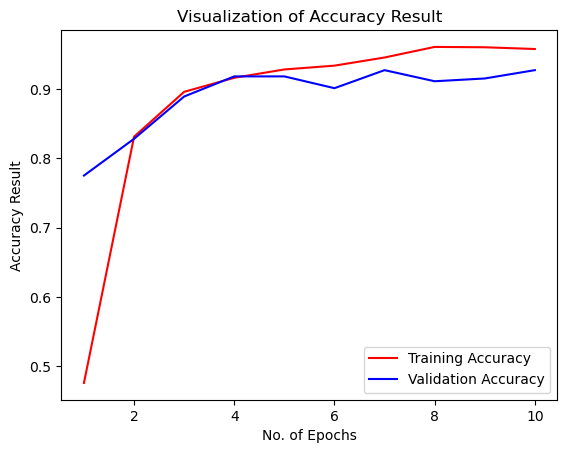

In [49]:
epochs = [ i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

# Some other metrics for model evolution


In [50]:
class_name = validation_set.class_names
class_name

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___healthy',
 'Mango___Powdery_mildew',
 'Mango_healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Rice_Brown_Spot',
 'Rice_healthy']

In [51]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/lenovo/Downloads/dataset/dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1000 files belonging to 8 classes.


In [52]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step


(array([[8.66028905e-01, 1.77014641e-07, 1.03999055e-05, ...,
         2.85206420e-06, 1.51488408e-07, 2.30142003e-08],
        [9.99995112e-01, 1.18561888e-06, 2.47165559e-07, ...,
         6.32112274e-09, 1.56668492e-08, 1.56288460e-09],
        [9.99714315e-01, 2.67725234e-04, 1.16029810e-06, ...,
         5.67265545e-07, 9.18457260e-07, 2.37343571e-07],
        ...,
        [2.52500577e-05, 1.54116264e-04, 1.28971515e-04, ...,
         2.67396426e-05, 3.18182558e-01, 6.81328535e-01],
        [2.05289216e-05, 1.63964476e-04, 1.85156299e-04, ...,
         3.70634516e-05, 1.61826536e-01, 8.36657643e-01],
        [1.09565026e-05, 1.27580672e-04, 4.86253230e-05, ...,
         1.19667002e-05, 4.28717397e-02, 9.56775308e-01]], dtype=float32),
 (1000, 8))

In [53]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [54]:
predicted_categories

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    

In [55]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [56]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(Y_true,predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.99      0.97       125
                            Corn_(maize)___healthy       0.99      0.98      0.98       125
                            Mango___Powdery_mildew       1.00      0.99      1.00       125
                                     Mango_healthy       1.00      1.00      1.00       125
                             Potato___Early_blight       0.99      0.98      0.99       125
                                  Potato___healthy       0.99      0.98      0.99       125
                                   Rice_Brown_Spot       0.72      0.79      0.76       125
                                      Rice_healthy       0.78      0.70      0.73       125

                                          accuracy                           0.93      1000
                                         macro avg       0.93      0.93      0

In [59]:
cn = confusion_matrix(Y_true,predicted_categories)
cn

array([[124,   0,   0,   0,   0,   1,   0,   0],
       [  3, 122,   0,   0,   0,   0,   0,   0],
       [  0,   0, 124,   0,   1,   0,   0,   0],
       [  0,   0,   0, 125,   0,   0,   0,   0],
       [  2,   0,   0,   0, 123,   0,   0,   0],
       [  2,   0,   0,   0,   0, 123,   0,   0],
       [  0,   1,   0,   0,   0,   0,  99,  25],
       [  0,   0,   0,   0,   0,   0,  38,  87]], dtype=int64)

# Confusion Matrix Visualization

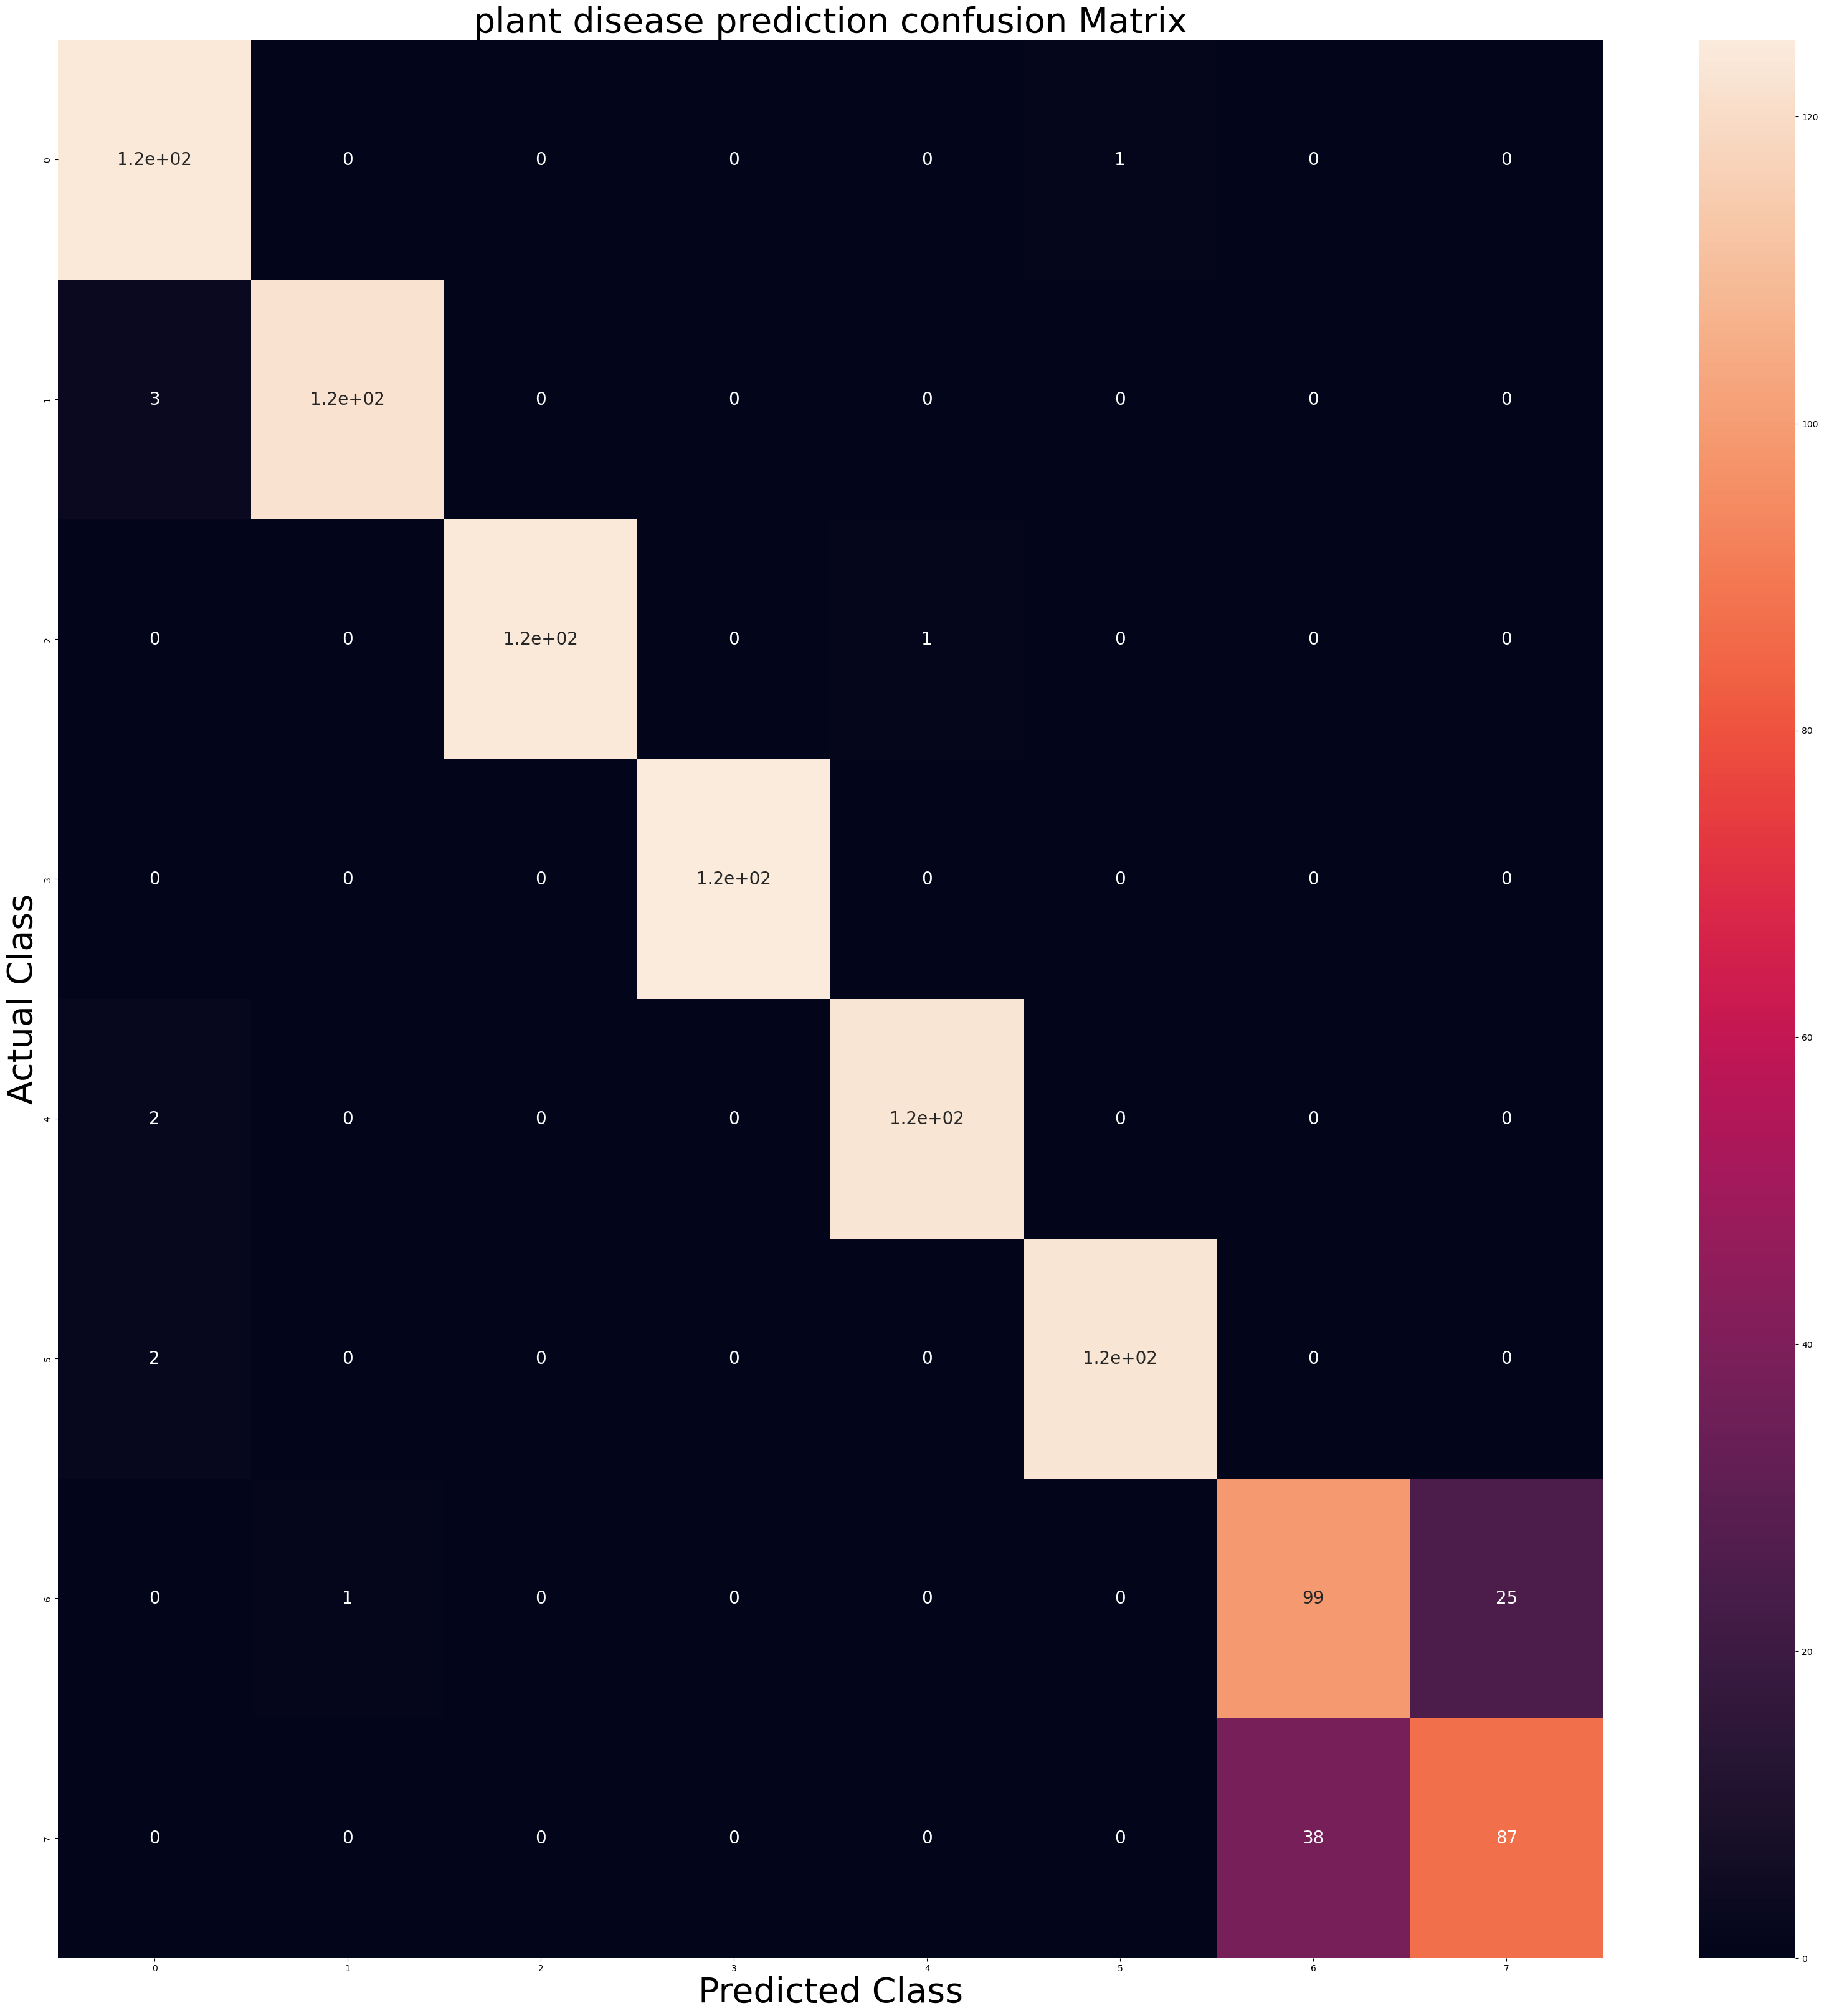

In [60]:
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True,annot_kws={'size':20})
plt.xlabel("Predicted Class",fontsize=40)
plt.ylabel("Actual Class",fontsize=40)
plt.title("plant disease prediction confusion Matrix", fontsize=40)
plt.show()